In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from sklearn.manifold import TSNE
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import seaborn as sns

In [3]:
dataset = pd.read_csv("dataparser-python/Processed_dataset.csv")

In [4]:
brch = Birch(threshold=15.097932202030867, branching_factor=54, n_clusters=4)
brch.fit(dataset)

Birch(branching_factor=54, n_clusters=4, threshold=15.097932202030867)

In [5]:
TSNE_2d = TSNE(n_components=2).fit_transform(dataset)

In [6]:
labels, count = np.unique(brch.labels_, return_counts=True)

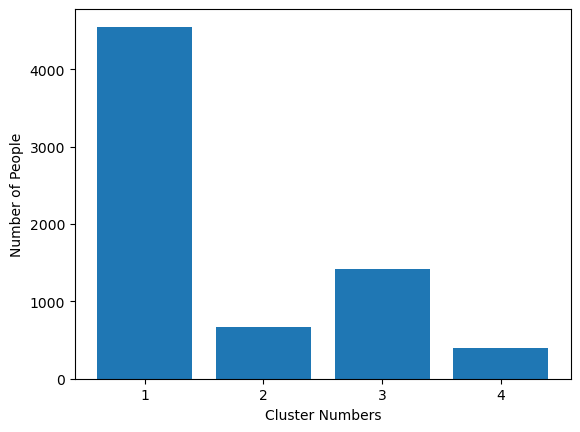

In [7]:
plt.bar(x=labels+1,height=count)
plt.xticks(labels+1)
plt.xlabel("Cluster Numbers")
plt.ylabel("Number of People")
plt.show()

[Text(0.5, 1.0, 'Birch Clusters')]

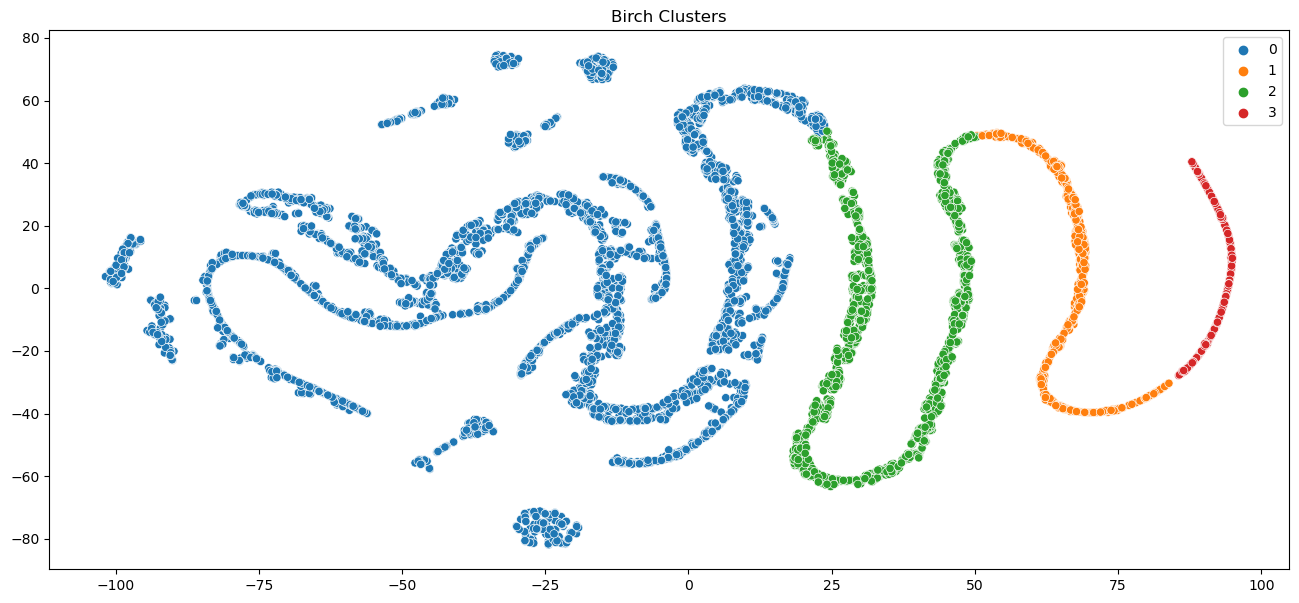

In [8]:

plt.figure(figsize=(16,7))
sns.scatterplot(x=TSNE_2d[:,0],y=TSNE_2d[:,1],hue=brch.labels_,palette="tab10").set(title='Birch Clusters')

In [19]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(dataset)):
    if brch.labels_[i] == 0:
        cluster1.append(i)
    elif brch.labels_[i] == 1:
        cluster_2.append(i)
    elif brch.labels_[i] == 2:
        cluster_3.append(i)
    elif brch.labels_[i] == 3:
        cluster_4.append(i)

### Average Values Of Each Cluster

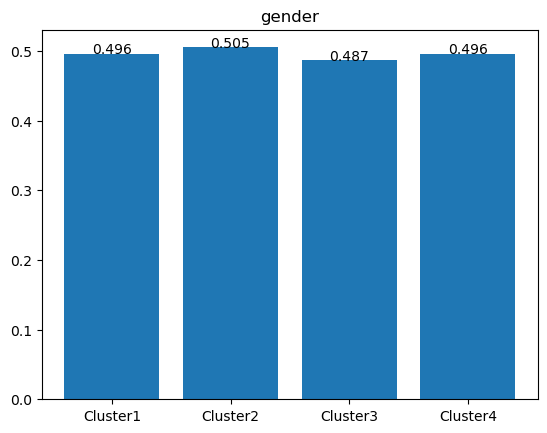

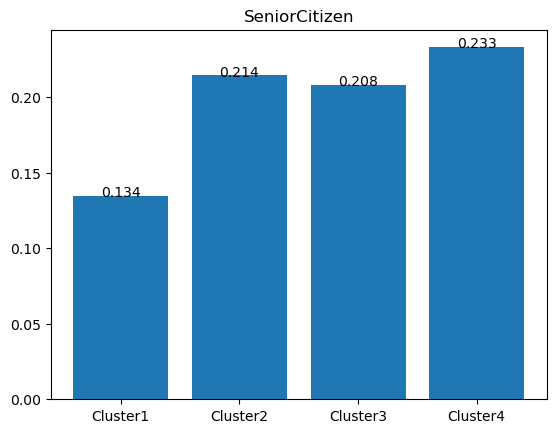

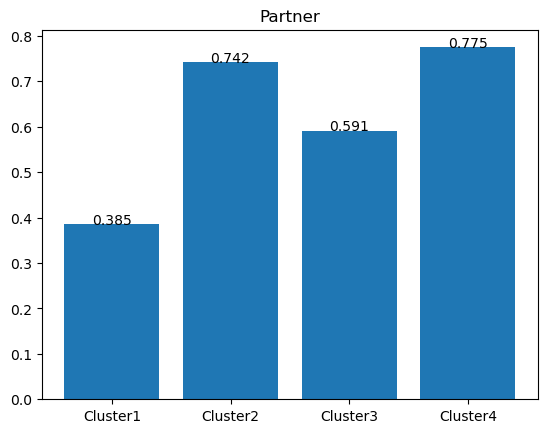

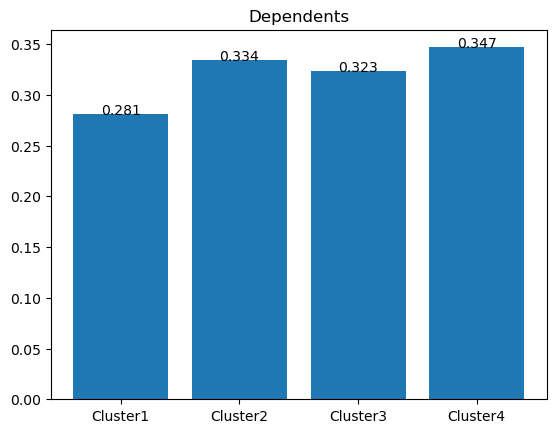

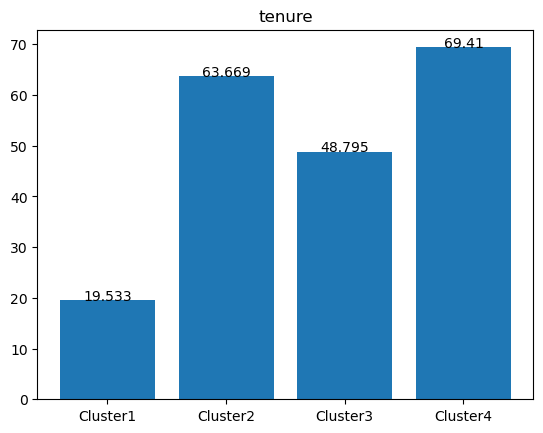

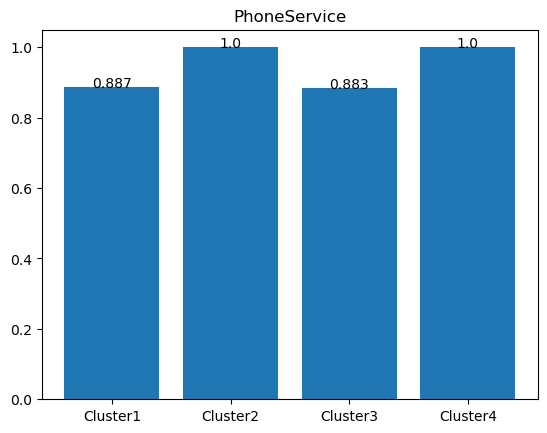

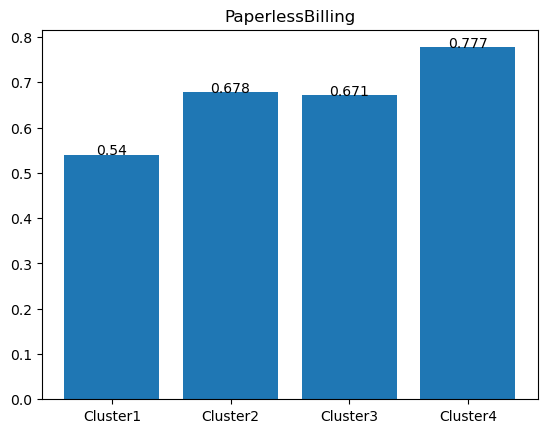

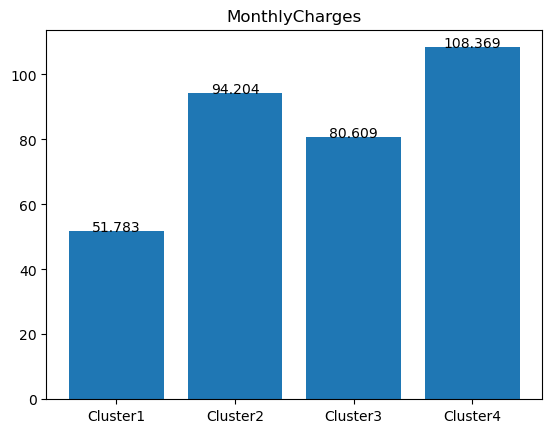

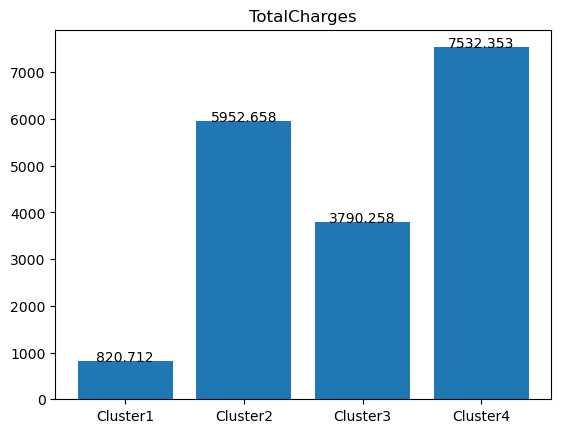

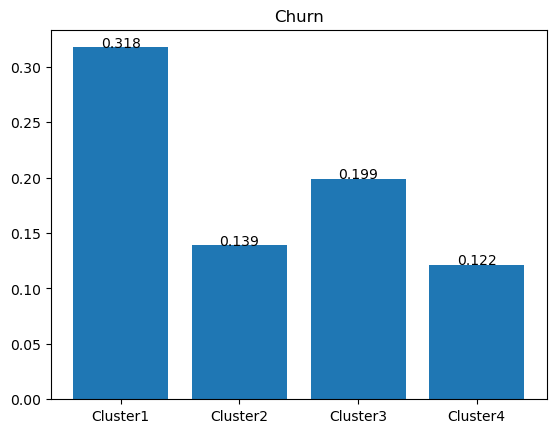

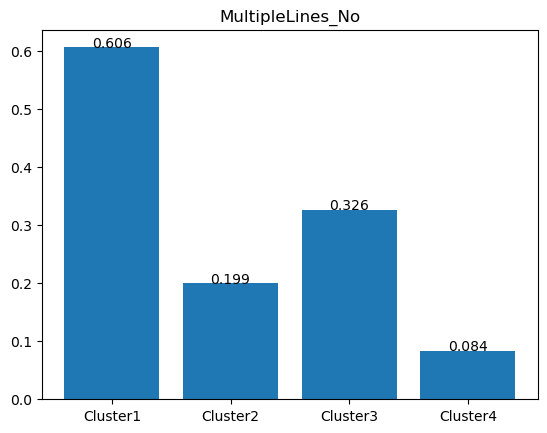

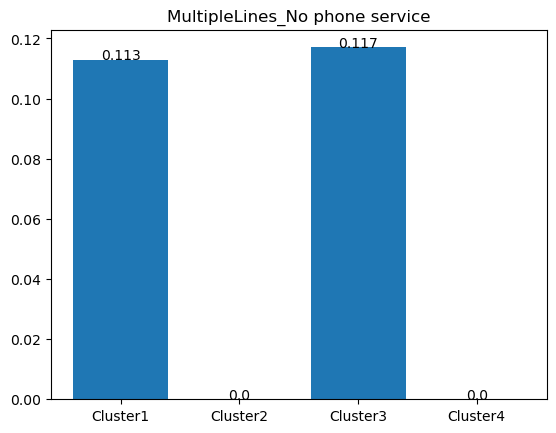

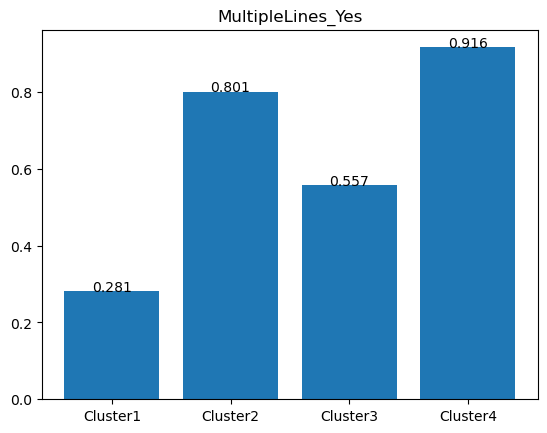

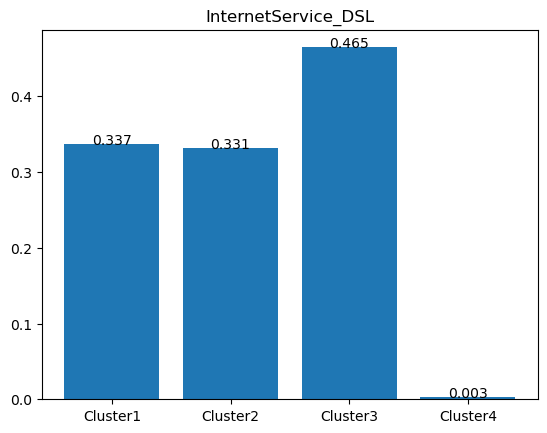

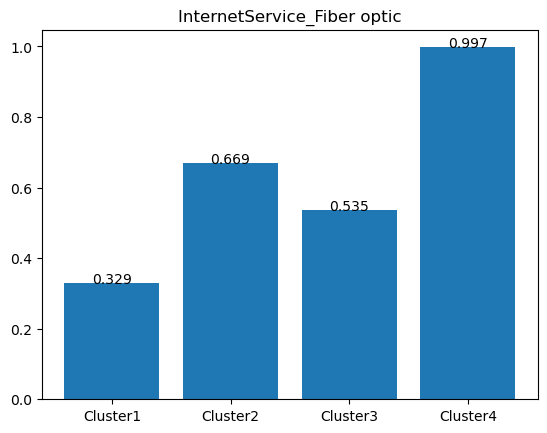

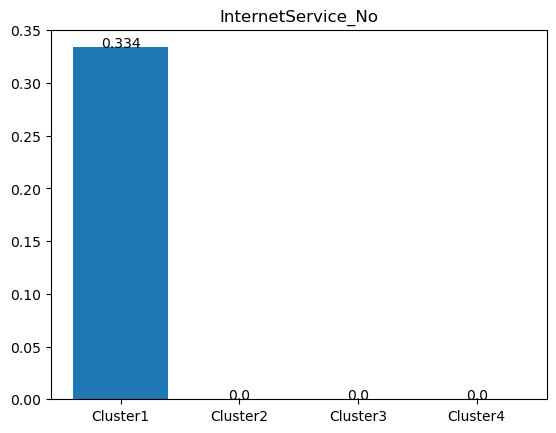

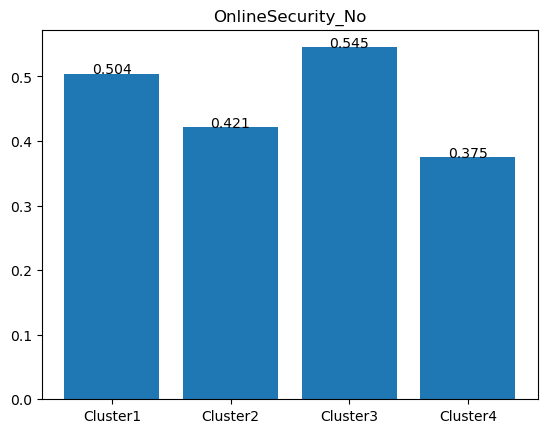

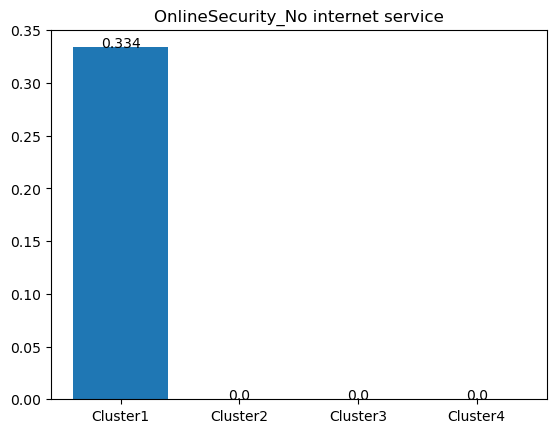

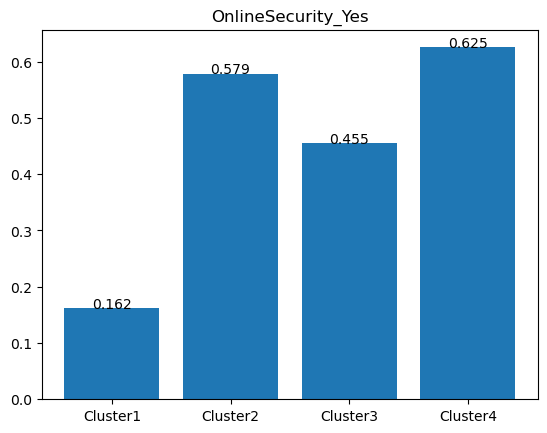

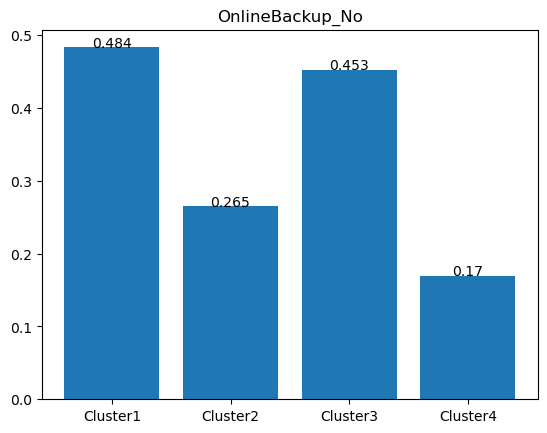

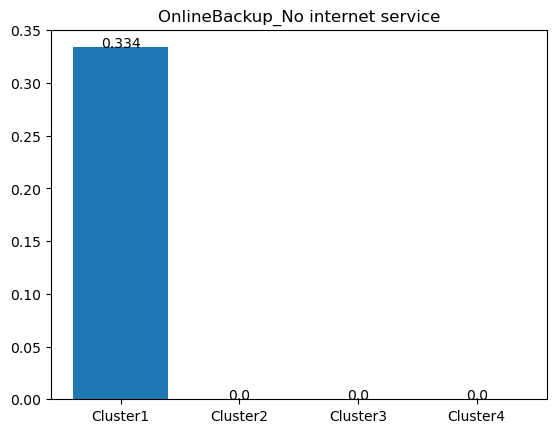

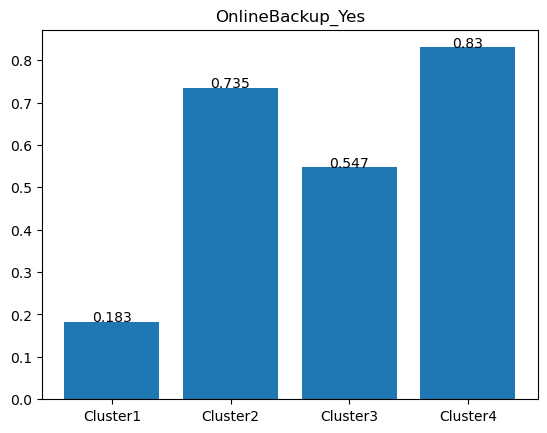

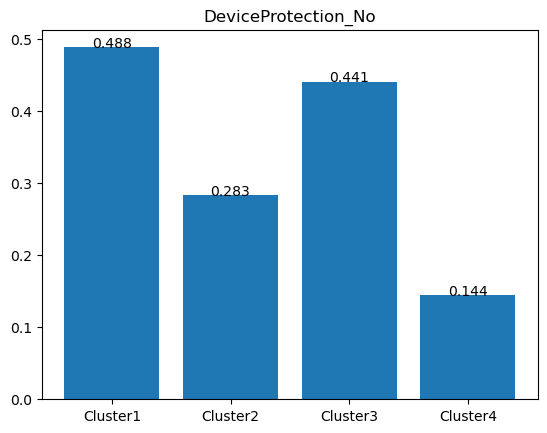

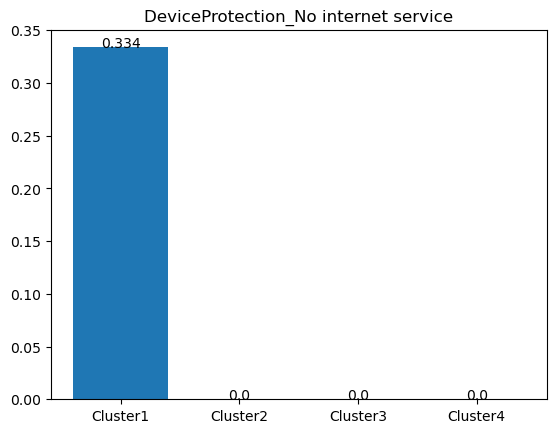

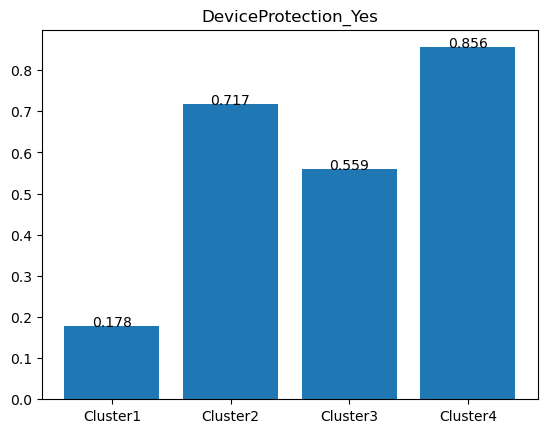

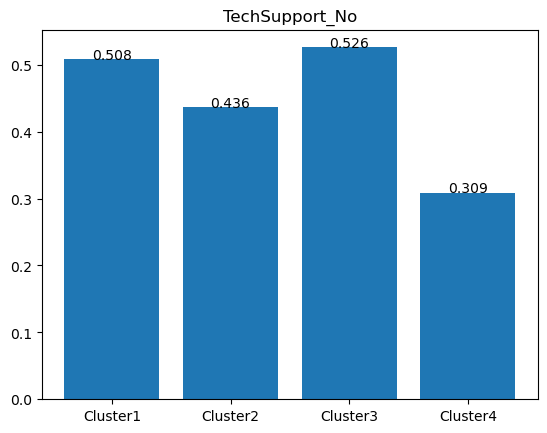

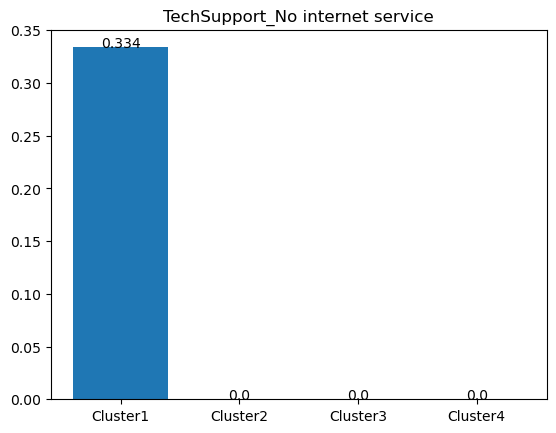

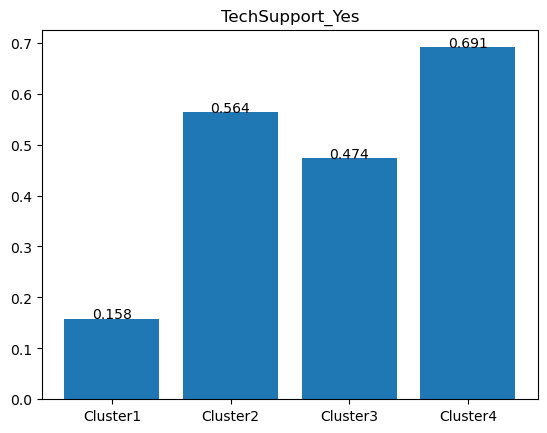

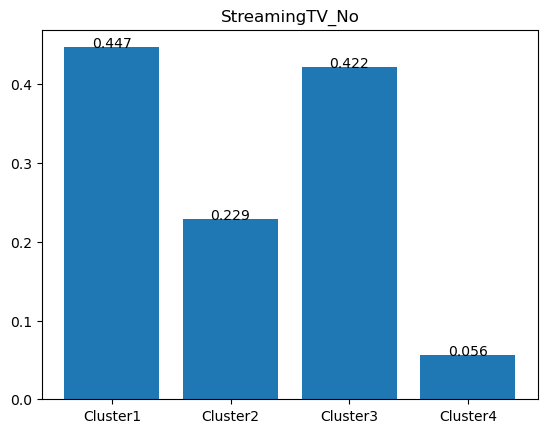

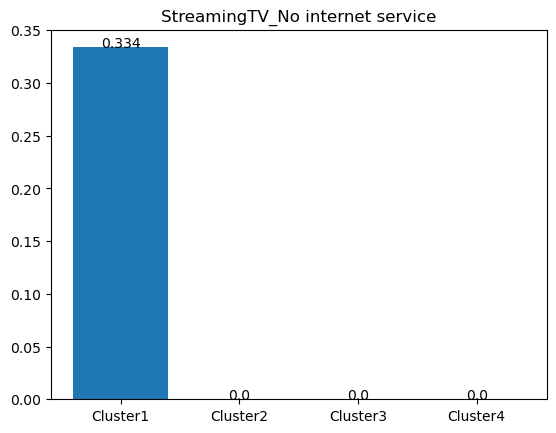

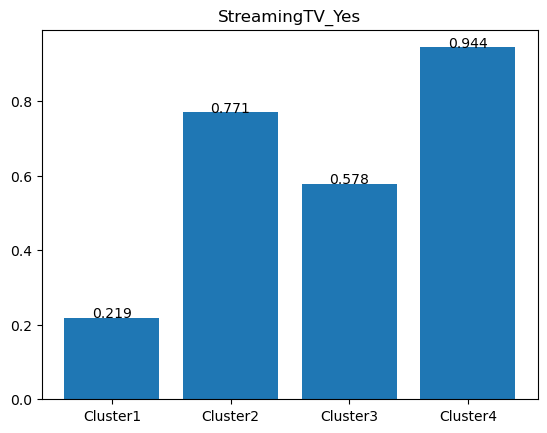

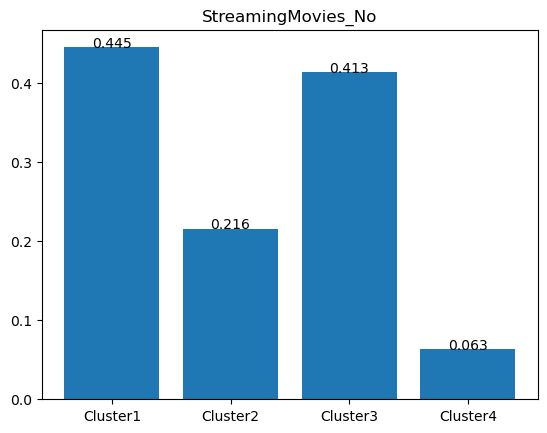

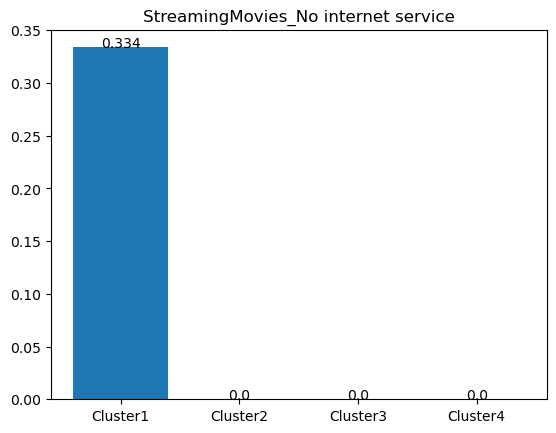

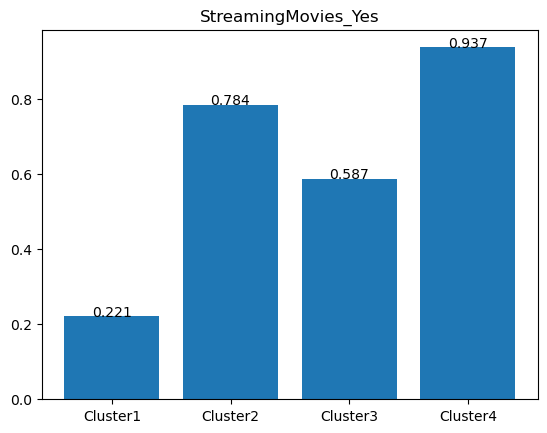

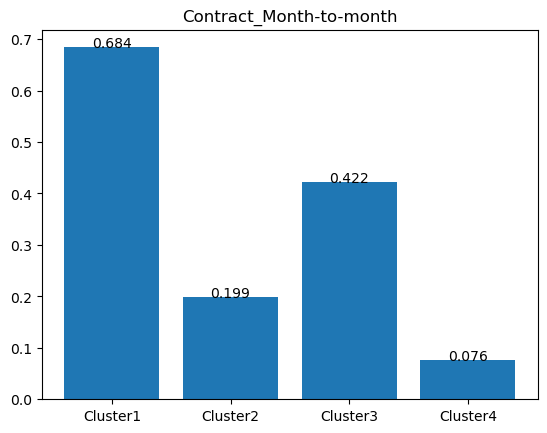

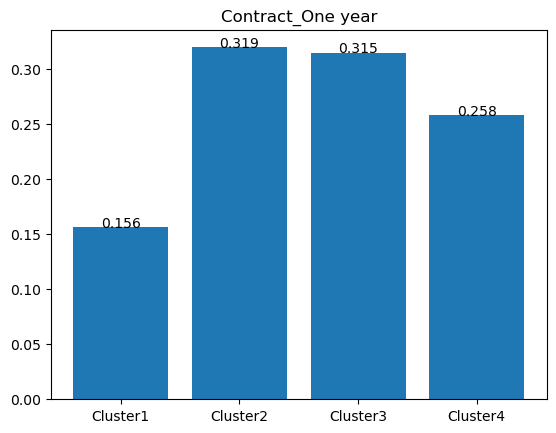

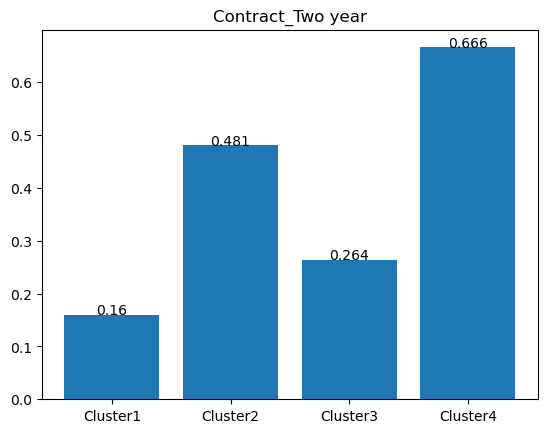

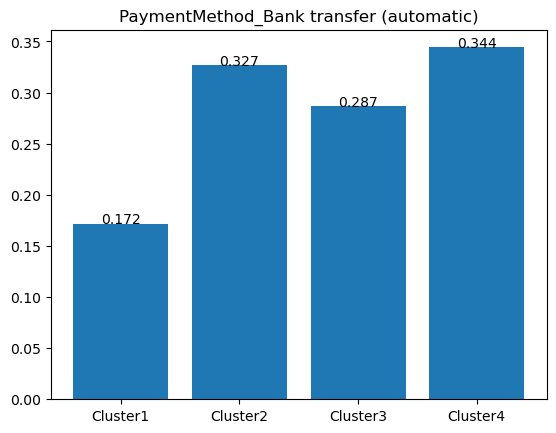

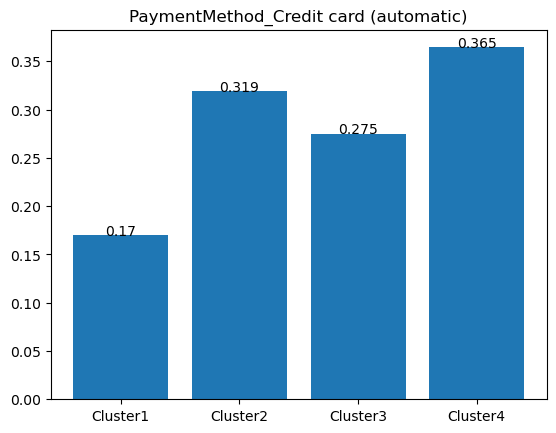

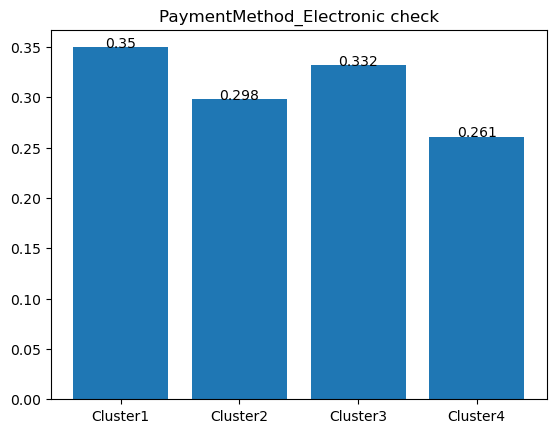

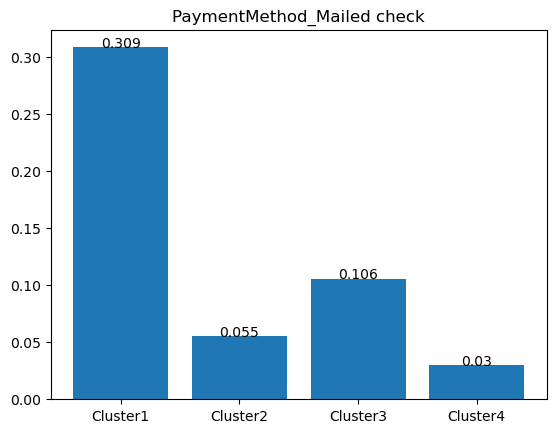

In [10]:
import csv

def addlabels(x,y):
    for a in range(len(x)):
        plt.text(a, round(y[a], 3), round(y[a], 3), ha ='center')

cluster_numbers = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"]
        
with open('dataparser-python/Processed_dataset.csv', 'r') as f:
    dict_reader = csv.DictReader(f)
    headers = dict_reader.fieldnames
    
    for header in headers:
        cluster1Value = 0
        for value in cluster1:
            clusterValue = dataset[header][value]
            cluster1Value = cluster1Value + clusterValue
        cluster1Value = cluster1Value / len(cluster1)
        
        cluster2Value = 0
        for value in cluster_2:
            clusterValue = dataset[header][value]
            cluster2Value = cluster2Value + clusterValue
        cluster2Value = cluster2Value / len(cluster_2)
        
        cluster3Value = 0
        for value in cluster_3:
            clusterValue = dataset[header][value]
            cluster3Value = cluster3Value + clusterValue
        cluster3Value = cluster3Value / len(cluster_3)
        
        cluster4Value = 0
        for value in cluster_4:
            clusterValue = dataset[header][value]
            cluster4Value = cluster4Value + clusterValue
        cluster4Value = cluster4Value / len(cluster_4)
                
        values = [cluster1Value, cluster2Value, cluster3Value, cluster4Value]
        plt.bar(cluster_numbers, values)
        plt.title(header)
        addlabels(cluster_numbers, values)
        plt.show()

In [11]:
untouchedDataset = pd.read_csv("dataparser-python/dataset.csv")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],3), ha = 'center')
def addlabels_2(x,y,width):
    for i in range(len(x)):
        plt.text(i+width, y[i], round(y[i],3), ha = 'center')

In [12]:
def parser(header, label1, label2, yLabel, yesLabelText, noLabelText):
    cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes = 0, 0, 0, 0
    cluster1No, cluster2No, cluster3No, cluster4No = 0, 0, 0, 0

    for value in cluster1:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster1Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster1No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_2:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster2Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster2No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_3:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster3Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster3No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    for value in cluster_4:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster4Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster4No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)

    plt.title(header)
    values1 = [cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes]
    values2 = [cluster1No, cluster2No, cluster3No, cluster4No]


    x = np.arange(len(cluster_numbers))

    width = 0.35

    bar1 =  plt.bar(x - width/2, values1, width = width,  edgecolor = 'black', label = yesLabelText)
    bar2 = plt.bar(x + width/2, values2, width=width, edgecolor = 'black', label = noLabelText)

    for bar in bar1:
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')

    for bar in bar2:
        plt.text(bar.get_x() + bar.get_width()/2 + 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')


    n= 4
    r = np.arange(n)
    plt.xticks(r + width/2,cluster_numbers)

    plt.legend()

    plt.ylabel(yLabel)
    plt.show()

### Cluster Comparisons

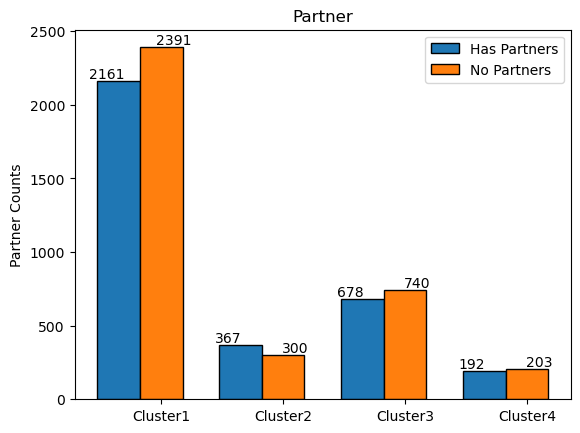

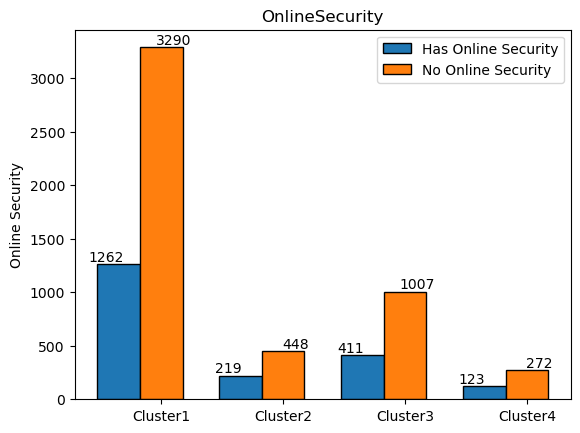

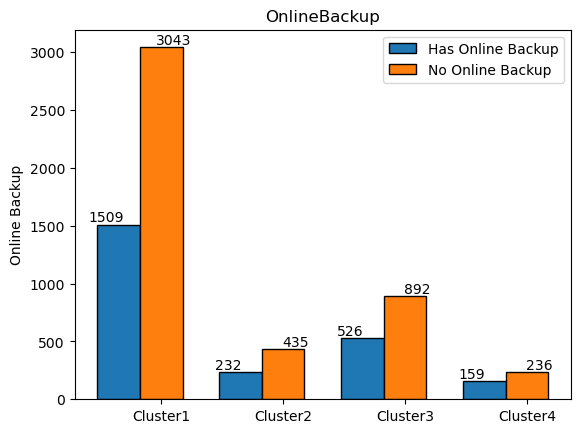

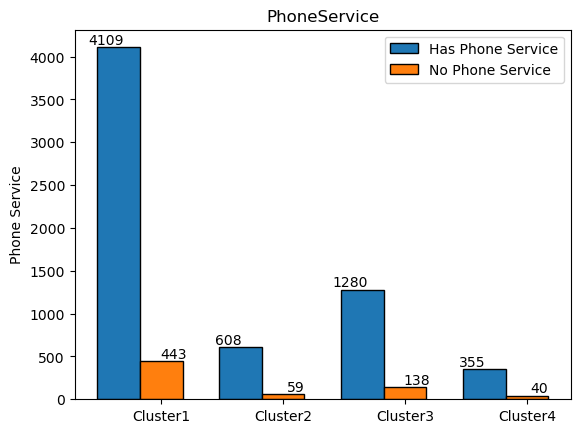

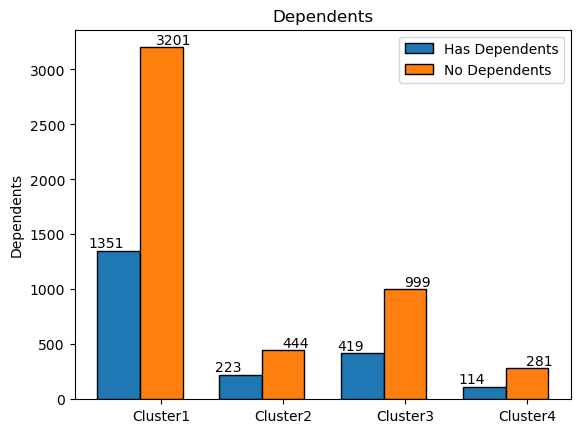

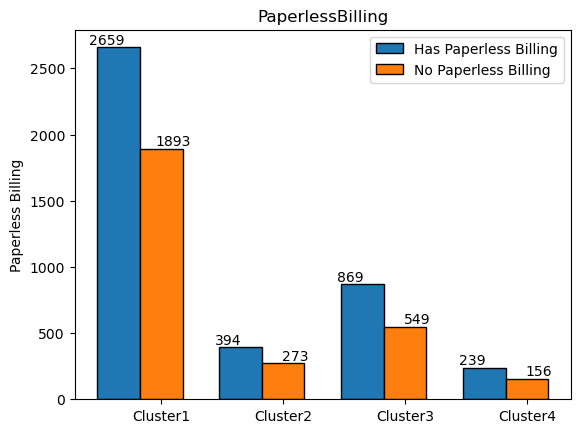

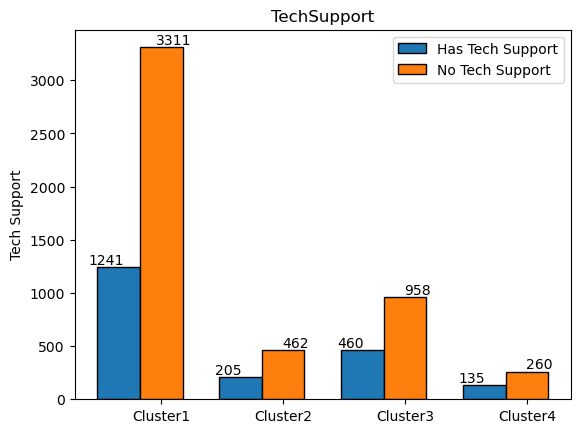

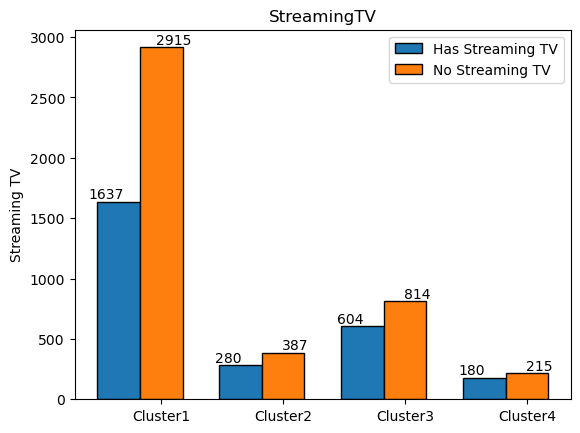

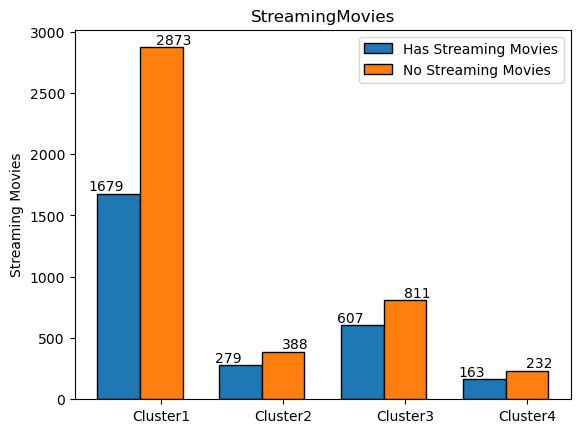

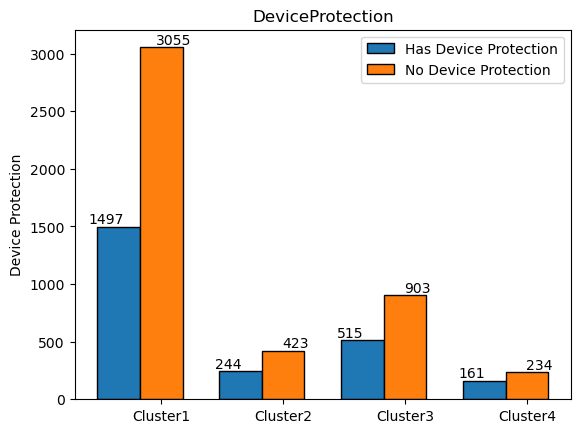

In [13]:
parser("Partner", "Yes", "No", "Partner Counts", "Has Partners", "No Partners")
parser("OnlineSecurity", "Yes", "No", "Online Security", "Has Online Security", "No Online Security")
parser("OnlineBackup", "Yes", "No", "Online Backup", "Has Online Backup", "No Online Backup")
parser("PhoneService", "Yes", "No", "Phone Service", "Has Phone Service", "No Phone Service")
parser("Dependents", "Yes", "No", "Dependents", "Has Dependents", "No Dependents")
parser("PaperlessBilling", "Yes", "No", "Paperless Billing", "Has Paperless Billing", "No Paperless Billing")
parser("TechSupport", "Yes", "No", "Tech Support", "Has Tech Support", "No Tech Support")
parser("StreamingTV", "Yes", "No", "Streaming TV", "Has Streaming TV", "No Streaming TV")
parser("StreamingMovies", "Yes", "No", "Streaming Movies", "Has Streaming Movies", "No Streaming Movies")
parser("DeviceProtection", "Yes", "No", "Device Protection", "Has Device Protection", "No Device Protection")

In [35]:
labels , count = np.unique(brch.labels_,return_counts=True)
print(labels,count)

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(dataset)):
    if brch.labels_[i] == 0:
        cluster_1.append(i)
    elif brch.labels_[i] == 1:
        cluster_2.append(i)
    elif brch.labels_[i] == 2:
        cluster_3.append(i)
    elif brch.labels_[i] == 3:
        cluster_4.append(i) 

value = ' '
untouchedDataset = untouchedDataset[untouchedDataset["TotalCharges"]!= value]

untouchedDataset["TotalCharges"] = untouchedDataset["TotalCharges"].astype("float64")


[0 1 2 3] [4552  667 1418  395]


# Information of Random People From Clusters

### (Cluster 1) Random 3 People

In [31]:
for i in range(3):
    random_index = random.choice(cluster_1)
    selected_element = untouchedDataset.iloc[random_index]
    print(f"Random Person #{i+1}", end = "\n\n")
    print(selected_element[3:], end = "\n------------------\n")

Random Person #1

gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                           No
tenure                                1
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                 Month-to-month
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                     20.2
TotalCharges                       20.2
Churn                                No
Name: 100, dtype: object
------------------
Random Person #2

gender                        Female
SeniorCitizen                      1
Partner                          Yes
Dependent

### (Cluster 2) Random 3 People

In [32]:
for i in range(3):
    random_index = random.choice(cluster_2)
    selected_element = untouchedDataset.iloc[random_index]
    print(f"Random Person #{i+1}", end = "\n\n")
    print(selected_element[3:], end = "\n------------------\n")

Random Person #1

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     53
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          111.8
TotalCharges                          5809.75
Churn                                      No
Name: 1926, dtype: object
------------------
Random Person #2


### (Cluster 3) Random 3 People

In [33]:
for i in range(3):
    random_index = random.choice(cluster_3)
    selected_element = untouchedDataset.iloc[random_index]
    print(f"Random Person #{i+1}", end = "\n\n")
    print(selected_element[3:], end = "\n------------------\n")

Random Person #1

gender                                   Male
SeniorCitizen                               1
Partner                                    No
Dependents                                 No
tenure                                     47
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           59.6
TotalCharges                           2754.0
Churn                                      No
Name: 570, dtype: object
------------------
Random Person #2



### (Cluster 4) Random 3 People

In [34]:
for i in range(3):
    random_index = random.choice(cluster_4)
    selected_element = untouchedDataset.iloc[random_index]
    print(f"Random Person #{i+1}", end = "\n\n")
    print(selected_element[3:], end = "\n------------------\n")

Random Person #1

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          115.8
TotalCharges                           8424.9
Churn                                      No
Name: 4545, dtype: object
------------------
Random Person #2
